# PULSAR CLASSIFICATION PROJECT!
## DSCI 100 007
### Group 36
#### Ruirui Ma, Emilio Rodriguez-Sanin, William Tan, Jinay Borana


In [7]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'tests.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


## Set Up

In [5]:
# RUN ME TO DOWNLOAD THE NEEDED FILE FOR ANALYSIS
download.file("https://archive.ics.uci.edu/static/public/372/htru2.zip", destfile = "./htru.zip")
unzip("./htru.zip", exdir = "data/") #unzip the zip to data folder

### Reading Data

In [16]:
pulsar_data = read_csv("data/HTRU_2.csv", col_names=c("Profile_mean", "Profile_stdev", "Profile_skewness", "Profile_kurtosis", "DM_mean", "DM_stdev", "DM_skewness", "DM_kurtosis", "class")) |>
              mutate(class = as.factor(class))
pulsar_data

Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Profile_mean, Profile_stdev, Profile_skewness, Profile_kurtosis, DM...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Profile_mean Profile_stdev Profile_skewness Profile_kurtosis DM_mean   
1     140.5625     55.68378      -0.2345714       -0.6996484       3.199833  
2     102.5078     58.88243       0.4653182       -0.5150879       1.677258  
3     103.0156     39.34165       0.3233284        1.0511644       3.121237  
⋮     ⋮            ⋮             ⋮                ⋮                ⋮         
17896 119.3359     59.93594      0.1593631        -0.74302540       21.430602
17897 114.5078     53.90240      0.2011614        -0.02478884        1.946488
17898  57.0625     85.79734      1.4063910         0.08951971      188.306020
      DM_stdev DM_skewness DM_kurtosis class
1     19.11043  7.975532    74.24222   0    
2     14.86015 10.576487   127.39358   0    
3     21.74467  7.735822    63.17191   0    
⋮     ⋮        ⋮           ⋮           ⋮    
17896 58.87200  2.499517     4.595173  0    
17897 13.38173 10.007967   134.238910  0    
17898 64.71256 -1.597527     1.429475  0

## Preliminary Exploratory Data

In [17]:
pulsar_summary  = pulsar_data |>
                  group_by(class) |>
                  summarize(count = n())
pulsar_summary

class count
1 0     16259
2 1      1639

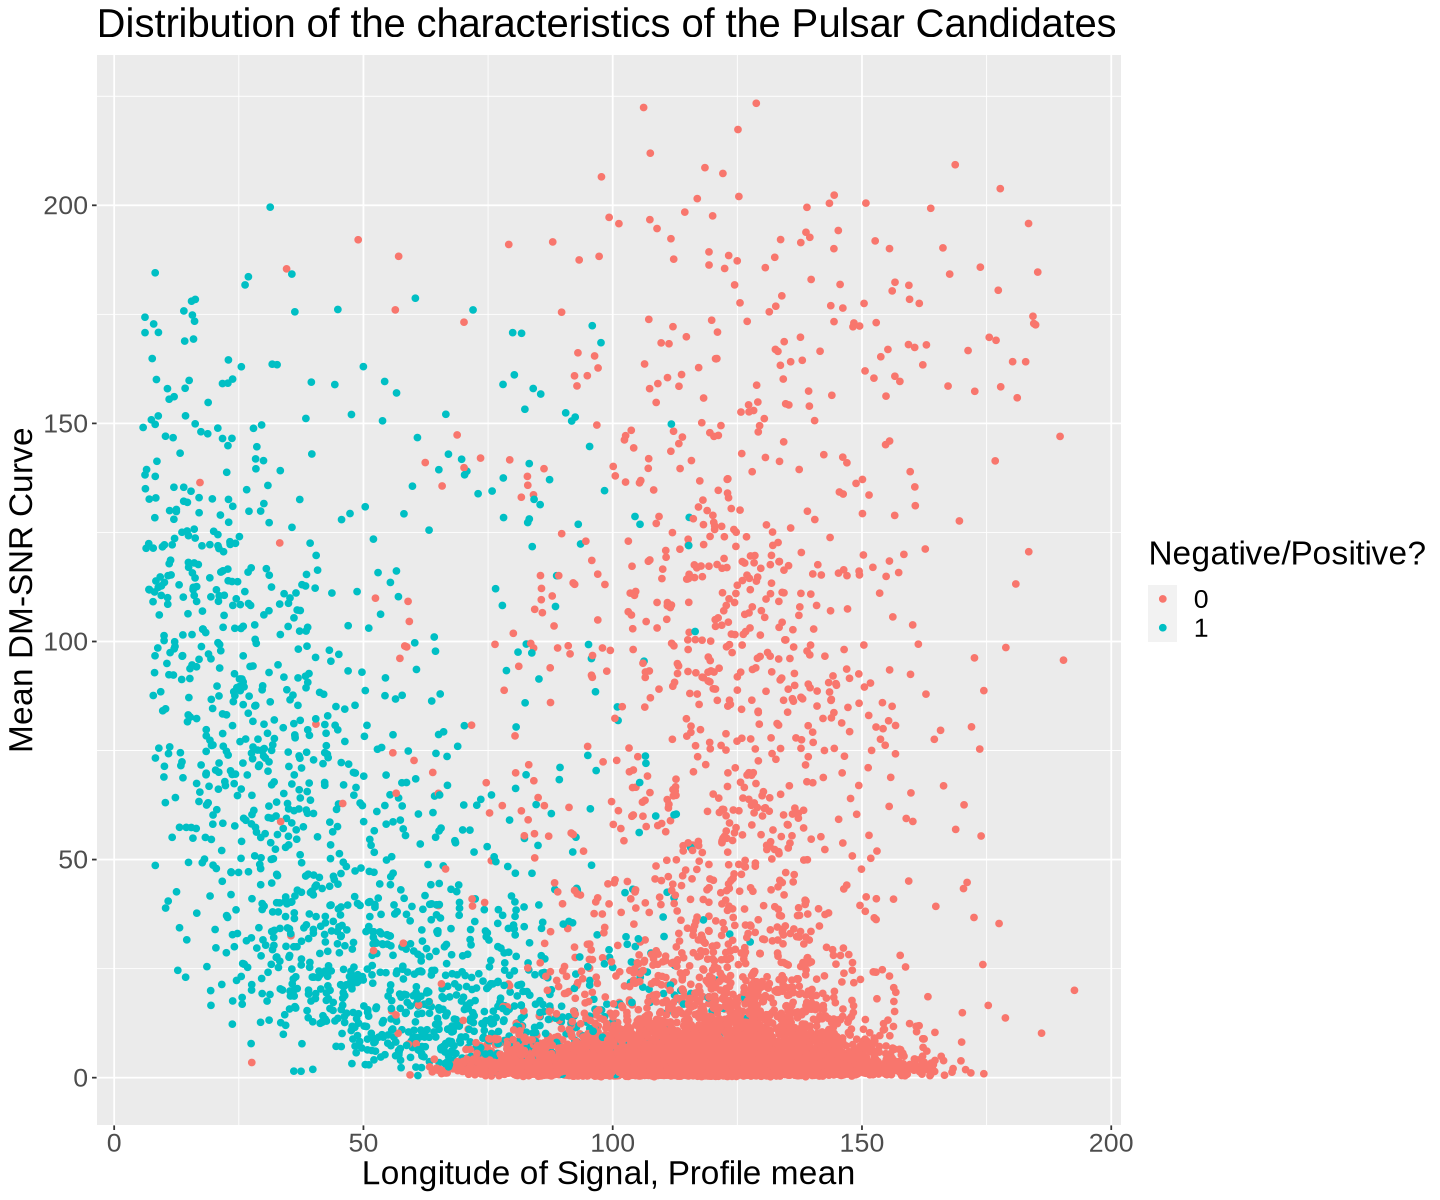

In [23]:
options(repr.plot.width = 12, repr.plot.height = 10)

pulsar_prelim_graph = pulsar_data |>
                      ggplot(aes(x=Profile_mean, y=DM_mean, color = class))+
                      geom_point()  +
                      labs(x= "Longitude of Signal, Profile mean", y = "Mean DM-SNR Curve", color = "Negative/Positive?")+
                      ggtitle("Distribution of the characteristics of the Pulsar Candidates") +
                      theme(text = element_text(size = 20))
pulsar_prelim_graph

In [25]:
#Save Image to a JPG file
ggsave("prelim_graph.jpg",pulsar_prelim_graph, width = 12, height =10)